<a href="https://colab.research.google.com/github/KraftJunk/mlProjectAirQuality/blob/main/completedNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting pm2.5 based on weather metrics

In [336]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
# Load the 1st dataset with mp2.5 and weather for Roscommon
df = pd.read_csv('weatherPm2Dataset.csv')


print(df.head())
print(df.info())


        date maxTemp  rainfall  pressure  windSpeed  pm2.5
0  01-Jan-19    10.2       0.7    1030.1        4.4    8.1
1  02-Jan-19     7.1       0.0    1033.0        4.3   14.9
2  03-Jan-19     8.1       0.1    1031.1        5.2   13.5
3  04-Jan-19     6.9       0.0    1030.9        5.9   18.7
4  05-Jan-19     8.2       0.6    1028.0        4.9   15.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1096 non-null   object 
 1   maxTemp    1035 non-null   object 
 2   rainfall   1035 non-null   float64
 3   pressure   1096 non-null   float64
 4   windSpeed  1096 non-null   float64
 5   pm2.5      1087 non-null   float64
dtypes: float64(4), object(2)
memory usage: 51.5+ KB
None


In [338]:
# Check the data types of columns in the DataFrame
print(df.dtypes)


date          object
maxTemp       object
rainfall     float64
pressure     float64
windSpeed    float64
pm2.5        float64
dtype: object


In [339]:



# Convert maxTemp from object to float
df['maxTemp'] = df['maxTemp'].astype(float)

# Check the data types again to verify the conversion
print(df.dtypes)

ValueError: ignored

In [340]:
# remove non numeric from maxTemp rows
non_numeric_rows = df[df['maxTemp'].str.strip() == ' ']

#replace missing with average
df['maxTemp'] = pd.to_numeric(df['maxTemp'], errors='coerce')
df['maxTemp'].fillna(df['maxTemp'].mean(), inplace=True)

# Convert maxTemp from object to float
df['maxTemp'] = df['maxTemp'].astype(float)

# Check the data types again to verify the conversion
print(df.dtypes)

date          object
maxTemp      float64
rainfall     float64
pressure     float64
windSpeed    float64
pm2.5        float64
dtype: object


In [341]:
#replace missing values with average
df['rainfall'].fillna(df['rainfall'].mean(), inplace=True)

In [342]:


# check that missing values are removed
print(df.isnull().sum())


date         0
maxTemp      0
rainfall     0
pressure     0
windSpeed    0
pm2.5        9
dtype: int64


<ipython-input-343-d2d8c57d297d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


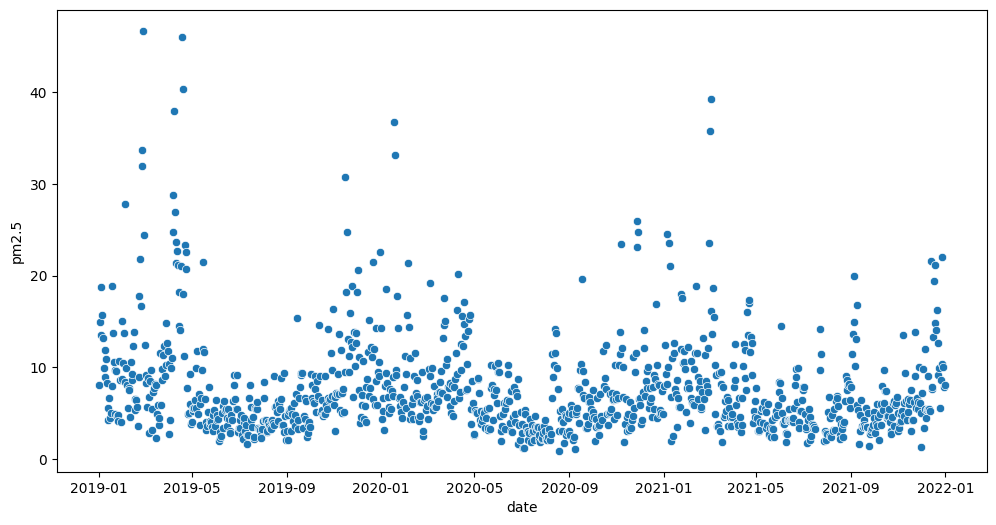

In [343]:
#drop any remaing missing values
df = df.dropna()

#Convert date/time columns
df['date'] = pd.to_datetime(df['date'])
#Scatter to visualise the our data points
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='pm2.5', data=df)
plt.show()

In [344]:
#Features
X = df[['rainfall', 'maxTemp', 'pressure', 'windSpeed']]

# Target variable
y = df['pm2.5']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [346]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [347]:
predictions = model.predict(X_test)

#Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18.04885694253525


In [348]:
#Features
X = df[['rainfall']]

# Target variable
y = df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

#Check accuracy using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 22.09778933830132


In [349]:
#Features
X = df[['maxTemp']]

# Target variable
y = df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

#check using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20.104491177780655


In [350]:
#Features
X = df[['pressure']]

# Target variable
y = df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

#Check accuracy Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21.787775165806952


In [351]:
#Features
X = df[['windSpeed']]

# Target variable
y = df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21.93669925562792


##Going to observe pm 2.5 and time and try to observe any trends, keeping Covid-19 in mind.

In [352]:
# Load the dataset
df = pd.read_csv('weatherPm2Dataset.csv')

# Explore the data
print(df.head())
print(df.info())

        date maxTemp  rainfall  pressure  windSpeed  pm2.5
0  01-Jan-19    10.2       0.7    1030.1        4.4    8.1
1  02-Jan-19     7.1       0.0    1033.0        4.3   14.9
2  03-Jan-19     8.1       0.1    1031.1        5.2   13.5
3  04-Jan-19     6.9       0.0    1030.9        5.9   18.7
4  05-Jan-19     8.2       0.6    1028.0        4.9   15.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1096 non-null   object 
 1   maxTemp    1035 non-null   object 
 2   rainfall   1035 non-null   float64
 3   pressure   1096 non-null   float64
 4   windSpeed  1096 non-null   float64
 5   pm2.5      1087 non-null   float64
dtypes: float64(4), object(2)
memory usage: 51.5+ KB
None


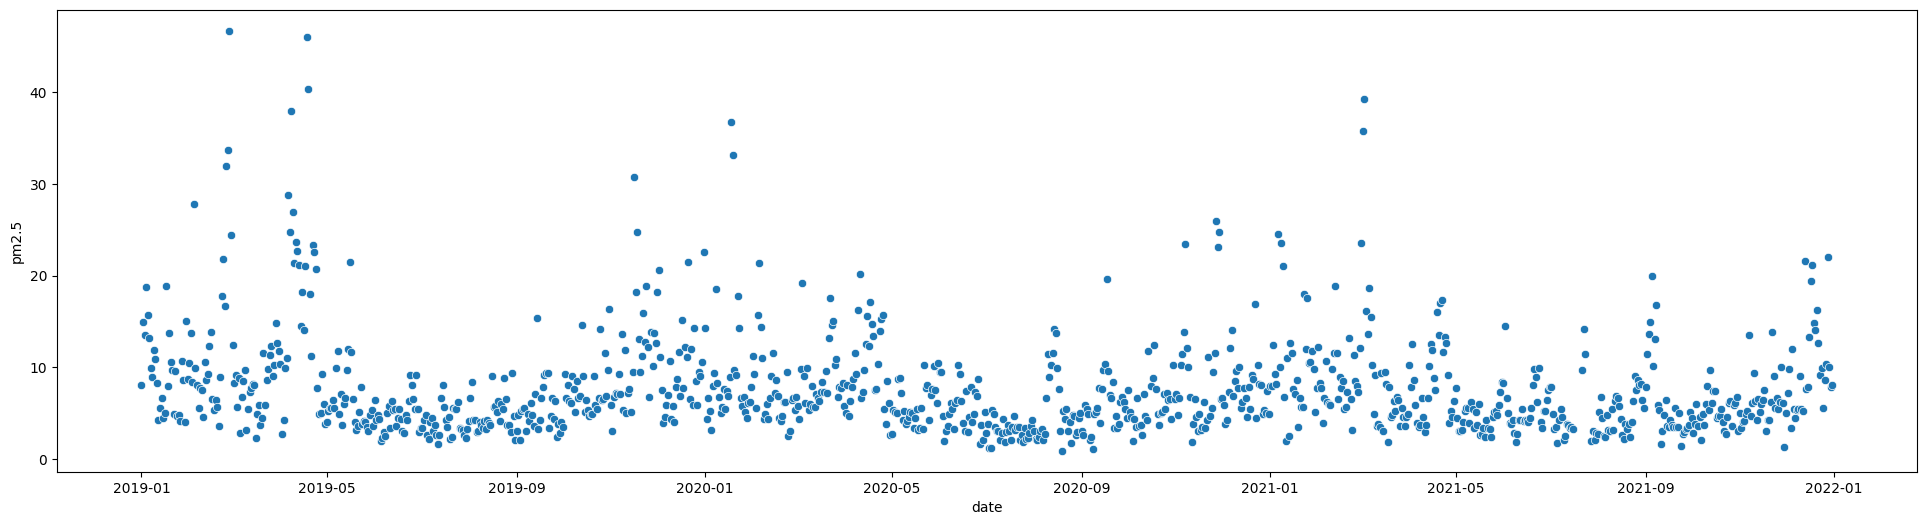

In [353]:
#Convert date/time columns
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(24, 6))
sns.scatterplot(x='date', y='pm2.5', data=df)
plt.show()

Mean Squared Error: 26.110770678730074


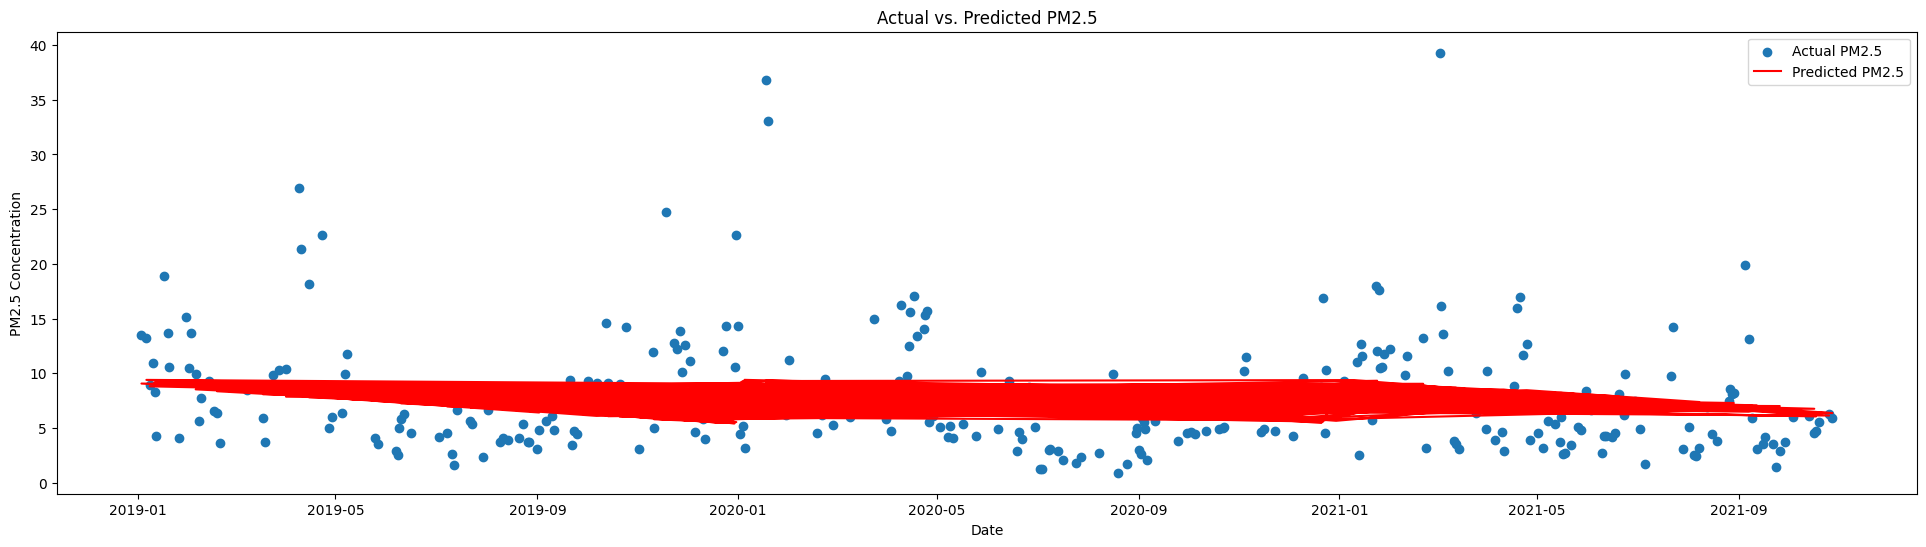

In [354]:
#Extract month and day of week & year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['day_of_year'] = pd.to_datetime(df['date']).dt.dayofyear

#drop the missing values
df = df.dropna()

# Definethe target variable
target_variable = 'pm2.5'

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=50)

# Select features and target variable
features = ['month','day_of_week','day_of_year']
X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Check accuracy
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted values
plt.figure(figsize=(24, 6))
plt.scatter(test_data['date'], y_test, label='Actual PM2.5')
plt.plot(test_data['date'], predictions, color='red', label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5')
plt.legend()
plt.show()

In [355]:
#Extract month and day of the week
df['year'] = pd.to_datetime(df['date']).dt.year

df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]
df_2021 = df[df['year'] == 2021]


Mean Squared Error: 59.79153632314435


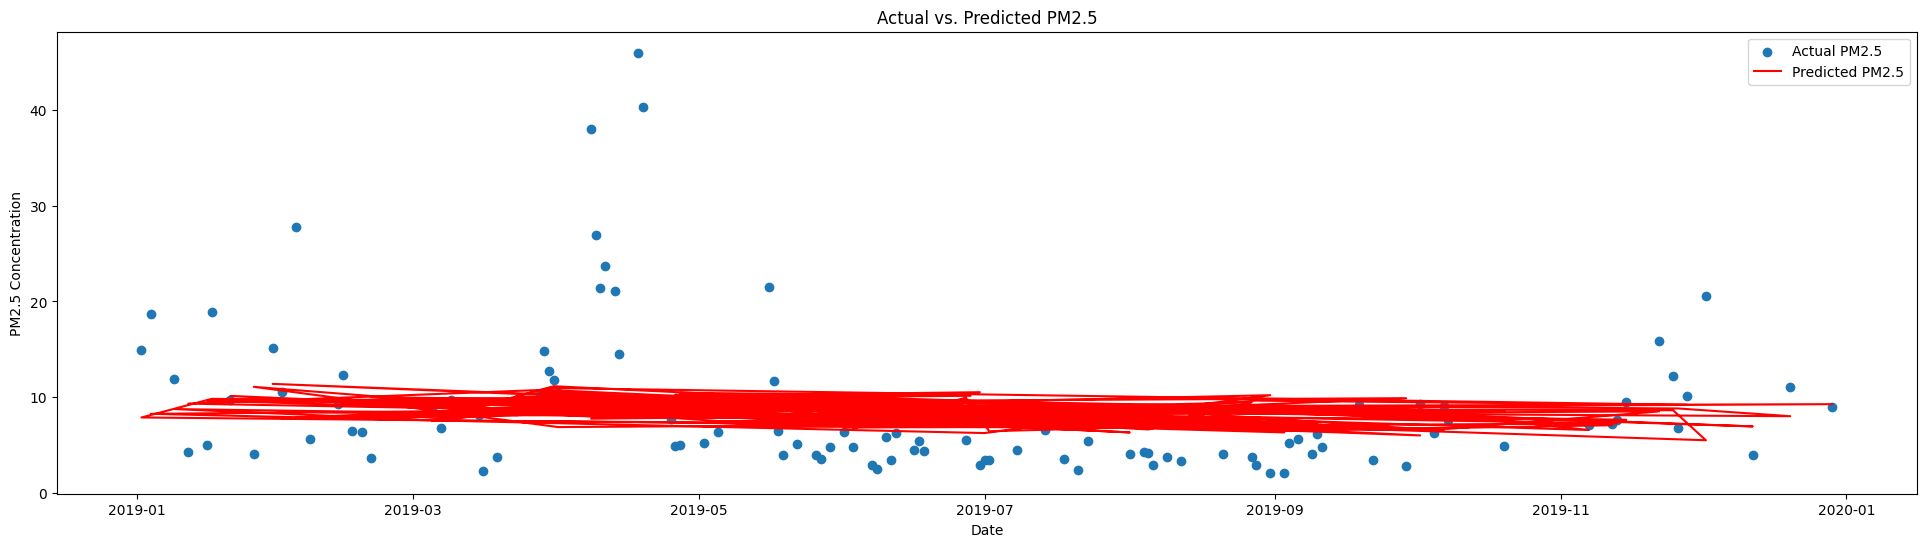

In [356]:

#drop the missing values
df_2019 = df_2019.dropna()

# Define a target varible
target_variable = 'pm2.5'

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_2019, test_size=0.3, random_state=50)

# Select features and target variable
features = ['month', 'day_of_week', 'day_of_year']
X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# check accuracy with mse
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted values
plt.figure(figsize=(24, 6))
plt.scatter(test_data['date'], y_test, label='Actual PM2.5')
plt.plot(test_data['date'], predictions, color='red', label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5')
plt.legend()
plt.show()

Mean Squared Error: 19.417479050750163


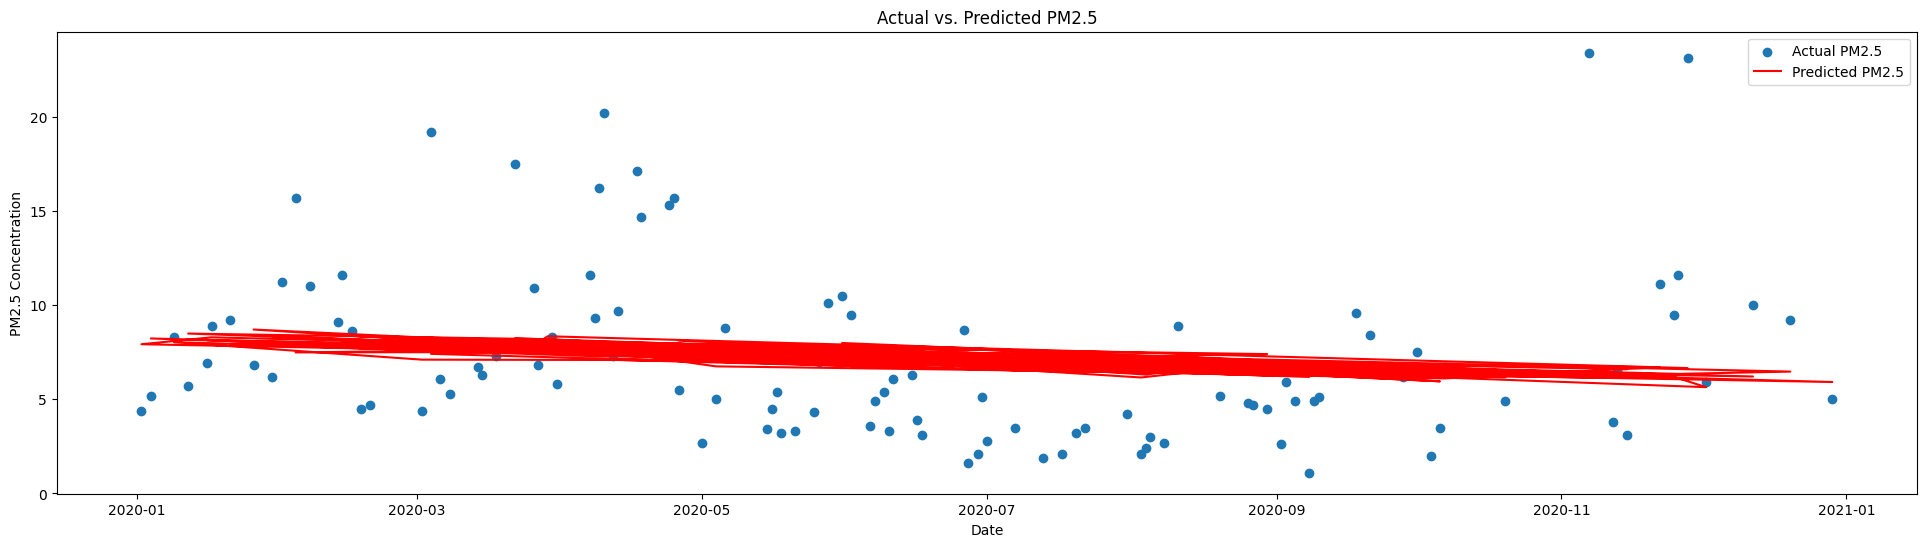

In [357]:

#drop the missing values
df_2020 = df_2020.dropna()

# Define a target variable
target_variable = 'pm2.5'

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_2020, test_size=0.3, random_state=50)

# Select features and target variable
features = ['month', 'day_of_week','day_of_year']
X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted values
plt.figure(figsize=(24, 6))
plt.scatter(test_data['date'], y_test, label='Actual PM2.5')
plt.plot(test_data['date'], predictions, color='red', label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5')
plt.legend()
plt.show()

Mean Squared Error: 24.464948267525745


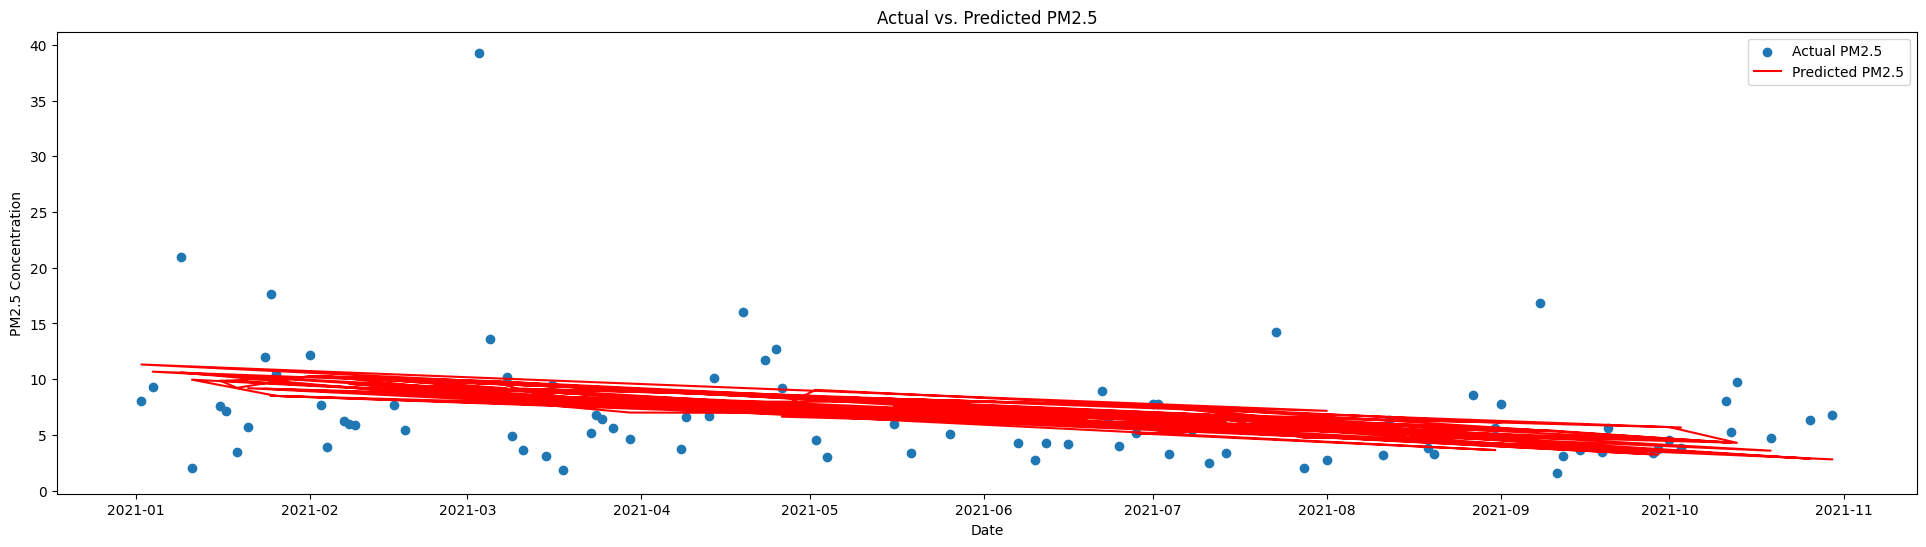

In [358]:
#drop the missing values
df_2021 = df_2021.dropna()

# Define a target variable
target_variable = 'pm2.5'

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_2021, test_size=0.3, random_state=50)

# Select features and target
features = ['month', 'day_of_week', 'day_of_year']
X_train, y_train = train_data[features], train_data[target_variable]
X_test, y_test = test_data[features], test_data[target_variable]

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predict on the test set
predictions = model.predict(X_test)

# Check acc.
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs. predicted values
plt.figure(figsize=(24, 6))
plt.scatter(test_data['date'], y_test, label='Actual PM2.5')
plt.plot(test_data['date'], predictions, color='red', label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5')
plt.legend()
plt.show()

           date  pm2.5  rolling_avg
0    2019-01-01    8.1     8.100000
30   2019-01-31    8.7     8.000000
60   2019-03-02    8.3    10.350000
90   2019-04-01   10.4    10.400000
120  2019-05-01    4.0     4.000000
150  2019-05-31    3.6     4.057143
180  2019-06-30    2.9     6.685714
210  2019-07-30    2.3     3.771429
240  2019-08-29    9.4     5.771429
270  2019-09-28    3.8     4.528571
300  2019-10-28   11.6     8.114286
330  2019-11-27   13.9    13.100000
360  2019-12-27    5.9    10.657143
390  2020-01-26    6.8    10.042857
420  2020-02-25    3.0     5.171429
450  2020-03-26   10.9    12.657143
480  2020-04-25   15.7    11.985714
510  2020-05-25    4.3     6.100000
540  2020-06-24    7.3     5.557143
570  2020-07-24    2.6     3.300000
600  2020-08-23    3.1     4.228571
630  2020-09-22    3.4     9.300000
660  2020-10-22    5.0     7.200000
690  2020-11-21    4.3     4.085714
720  2020-12-21    8.7     7.171429
750  2021-01-20    6.6     8.242857
780  2021-02-19    5.7     7

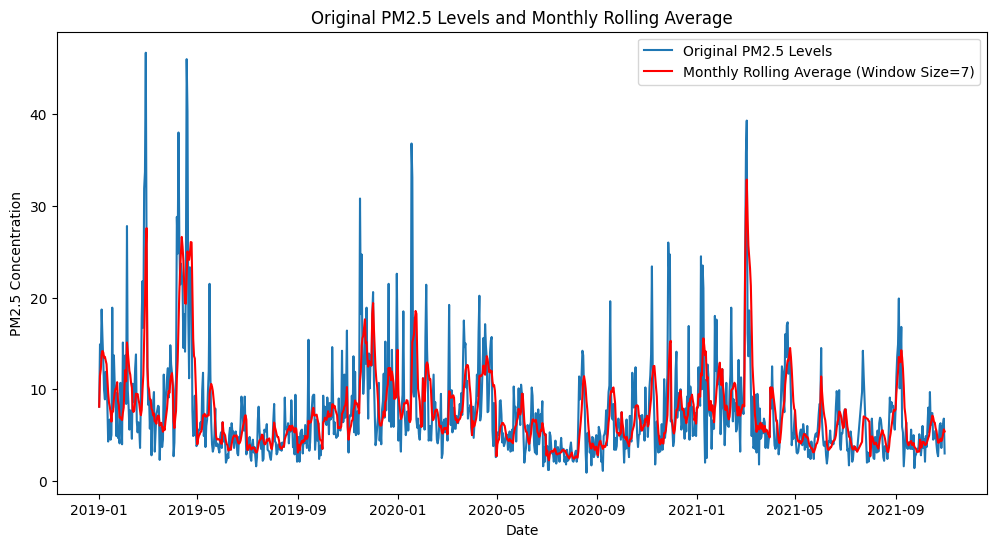

In [359]:



df['date'] = pd.to_datetime(df['date'])

# Extract the month and year from the date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate the monthly rolling average
window_size = 7
df['rolling_avg'] = df.groupby(['year', 'month'])['pm2.5'].rolling(window=window_size, min_periods=1).mean().reset_index(level=[0, 1], drop=True)

# Only show evry 30th row
every_30th_row = df[df.index % 30 == 0]

# show DataFrame with the monthly rolling average for every 30th row
print(every_30th_row[['date', 'pm2.5', 'rolling_avg']])

# Visualize the original pm2.5 levels and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['pm2.5'], label='Original PM2.5 Levels')
plt.plot(df['date'], df['rolling_avg'], label=f'Monthly Rolling Average (Window Size={window_size})', color='red')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Original PM2.5 Levels and Monthly Rolling Average')
plt.legend()
plt.show()


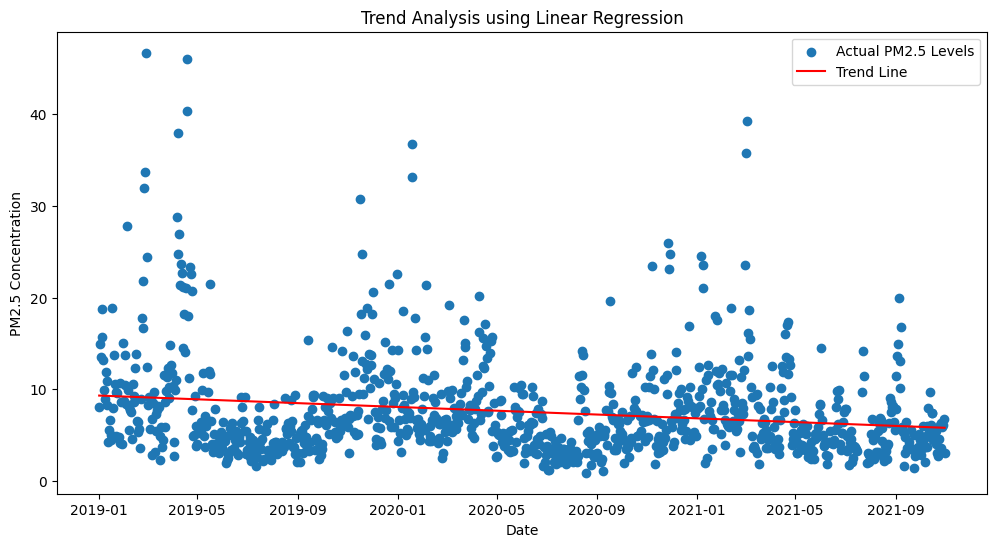

The slope (trend) of the regression line is: -0.0034


In [360]:
#Extract month and day of the week
df['year'] = pd.to_datetime(df['date']).dt.year

df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]
df_2021 = df[df['year'] == 2021]


# Extract number of days to map out as feature
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df[['days_since_start']], df['pm2.5'])

# Extract slope (trend) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['pm2.5'], label='Actual PM2.5 Levels')
plt.plot(df['date'], model.predict(df[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

# Print the slope of the regression line
print(f'The slope (trend) of the regression line is: {slope:.4f}')


<ipython-input-361-ff833254f72c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['days_since_start'] = (df['date'] - df['date'].min()).dt.days


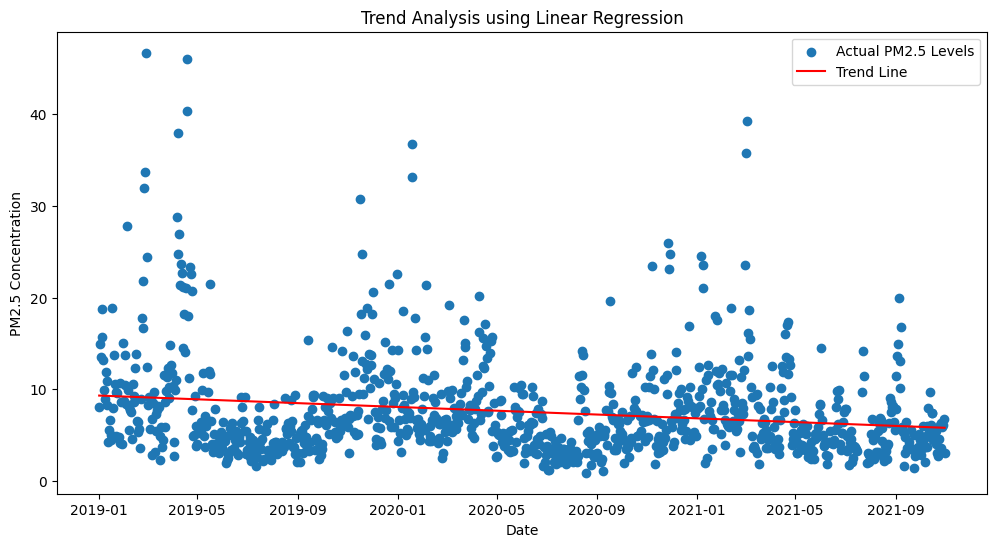

The slope (trend) of the regression line is: -0.0034


In [361]:
# Extract number of days
df_2019['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df[['days_since_start']], df['pm2.5'])

# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['pm2.5'], label='Actual PM2.5 Levels')
plt.plot(df['date'], model.predict(df[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

# Print the slope of the regression line
print(f'The slope (trend) of the regression line is: {slope:.4f}')

<ipython-input-362-c13e5ce513fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['days_since_start'] = (df_2019['date'] - df_2019['date'].min()).dt.days


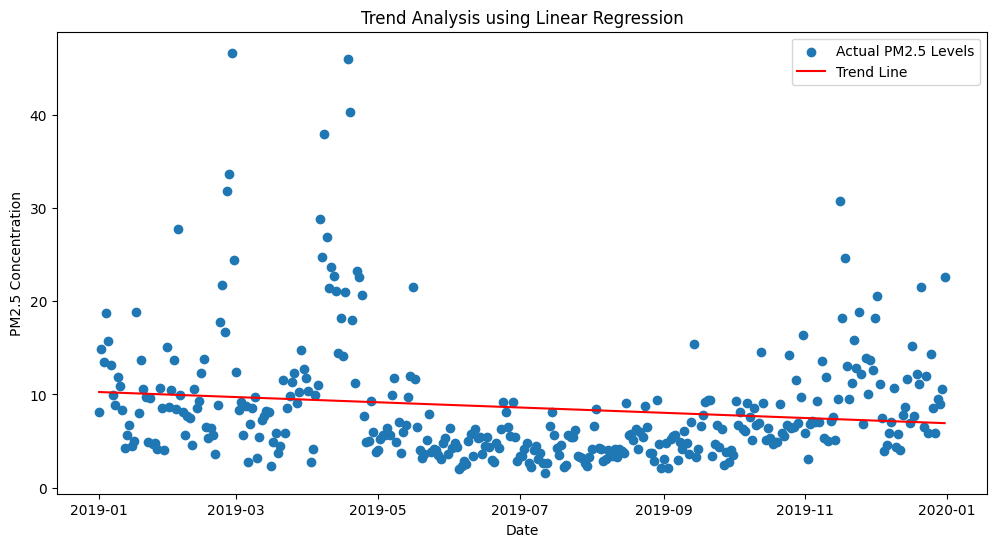

The slope (trend) of the regression line is: -0.0092


In [362]:
df_2019['days_since_start'] = (df_2019['date'] - df_2019['date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df_2019[['days_since_start']], df_2019['pm2.5'])

# Extract slope  and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df_2019['date'], df_2019['pm2.5'], label='Actual PM2.5 Levels')
plt.plot(df_2019['date'], model.predict(df_2019[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()


print(f'The slope (trend) of the regression line is: {slope:.4f}')

<ipython-input-363-c380f2eac0d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['days_since_start'] = (df_2020['date'] - df_2020['date'].min()).dt.days


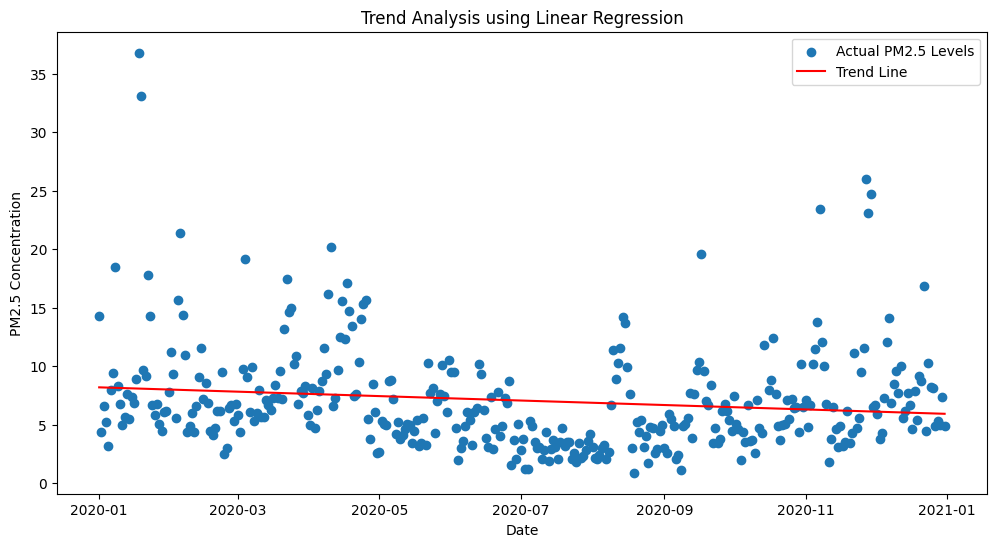

The slope (trend) of the regression line is: -0.0062


In [363]:

df_2020['days_since_start'] = (df_2020['date'] - df_2020['date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df_2020[['days_since_start']], df_2020['pm2.5'])

# Extract slop and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data along with regression line
plt.figure(figsize=(12, 6))
plt.scatter(df_2020['date'], df_2020['pm2.5'], label='Actual PM2.5 Levels')
plt.plot(df_2020['date'], model.predict(df_2020[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()


print(f'The slope (trend) of the regression line is: {slope:.4f}')

<ipython-input-364-882ef83ba631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['days_since_start'] = (df_2021['date'] - df_2021['date'].min()).dt.days


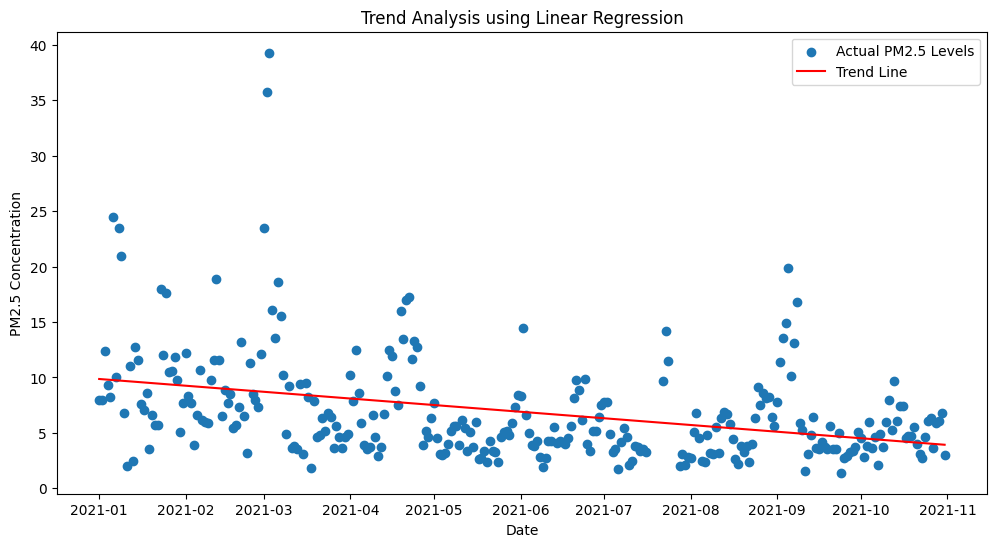

The slope (trend) of the regression line is: -0.0196


In [364]:

df_2021['days_since_start'] = (df_2021['date'] - df_2021['date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df_2021[['days_since_start']], df_2021['pm2.5'])

# Extract slope (trend) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df_2021['date'], df_2021['pm2.5'], label='Actual PM2.5 Levels')
plt.plot(df_2021['date'], model.predict(df_2021[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

print(f'The slope (trend) of the regression line is: {slope:.4f}')

In [365]:
# Load the dataset
df = pd.read_csv('fullshebang1.csv')

# Explore the data
print(df.head())
print(df.info())

         Date  Unnamed: 1  Unnamed: 2  Rathmines
0  01/01/2019         NaN         NaN        9.2
1  02/01/2019         NaN         NaN       18.2
2  03/01/2019         NaN         NaN        9.1
3  04/01/2019         NaN         NaN       12.9
4  05/01/2019         NaN         NaN       10.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1096 non-null   object 
 1   Unnamed: 1  0 non-null      float64
 2   Unnamed: 2  0 non-null      float64
 3   Rathmines   841 non-null    float64
dtypes: float64(3), object(1)
memory usage: 34.4+ KB
None


In [366]:
# Drop the 1st 2 columns
df = df.drop(columns=['Unnamed: 1', 'Unnamed: 2'])

# Display the new DataFrame
print(df)

            Date  Rathmines
0     01/01/2019        9.2
1     02/01/2019       18.2
2     03/01/2019        9.1
3     04/01/2019       12.9
4     05/01/2019       10.9
...          ...        ...
1091  27/12/2021        NaN
1092  28/12/2021        NaN
1093  29/12/2021        NaN
1094  30/12/2021        NaN
1095  31/12/2021        NaN

[1096 rows x 2 columns]


In [367]:
df['Rathmines'].fillna(df['Rathmines'].mean(), inplace=True)

<ipython-input-368-987b662eb580>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['year'] = pd.to_datetime(df['Date']).dt.year
<ipython-input-368-987b662eb580>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


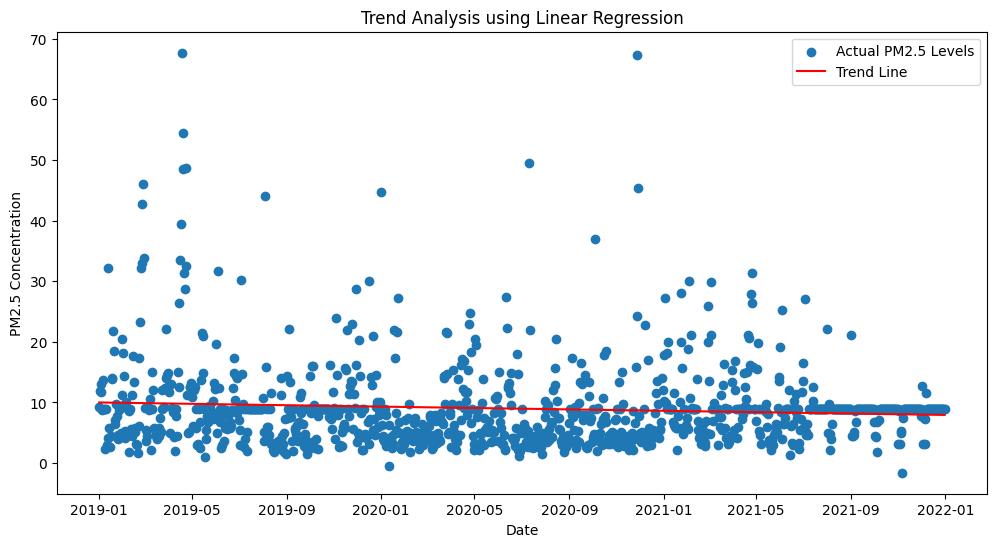

The slope (trend) of the regression line is: -0.0019


In [368]:
#Extract month and day of the week
df['year'] = pd.to_datetime(df['Date']).dt.year

df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]
df_2021 = df[df['year'] == 2021]

df['Date'] = pd.to_datetime(df['Date'])
# Extract numerical representation of date for regression
df['days_since_start'] = (df['Date'] - df['Date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df[['days_since_start']], df['Rathmines'])

# Extract slope  and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Rathmines'], label='Actual PM2.5 Levels')
plt.plot(df['Date'], model.predict(df[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

# Print the slope (trend) of the regression line
print(f'The slope (trend) of the regression line is: {slope:.4f}')

<ipython-input-369-0f1a0f7ca255>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2019['Date'] = pd.to_datetime(df_2019['Date'])
<ipython-input-369-0f1a0f7ca255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Date'] = pd.to_datetime(df_2019['Date'])
<ipython-input-369-0f1a0f7ca255>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['days_since_

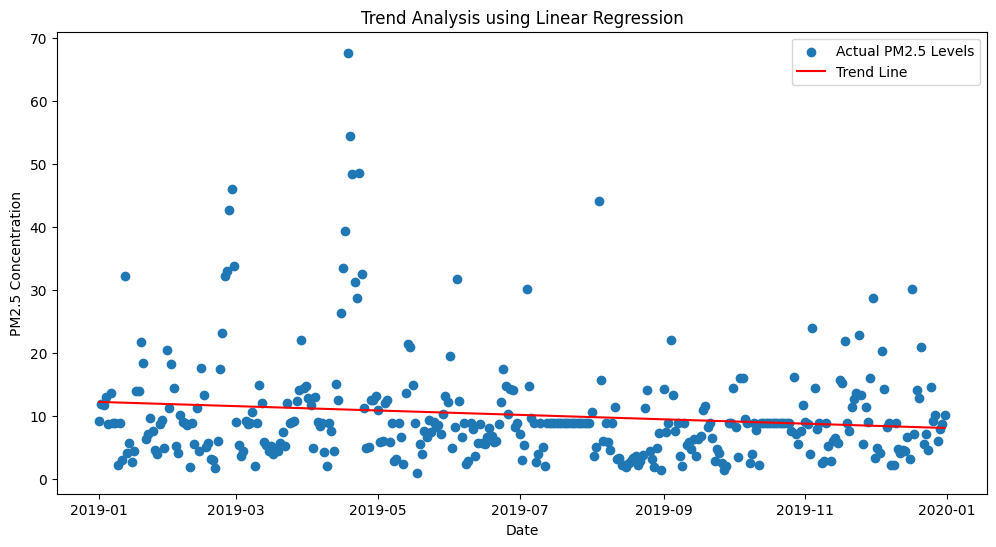

The slope (trend) of the regression line is: -0.0114


In [369]:

df_2019['Date'] = pd.to_datetime(df_2019['Date'])
# Extract numerical representation of date for regression
df_2019['days_since_start'] = (df_2019['Date'] - df_2019['Date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df_2019[['days_since_start']], df_2019['Rathmines'])

# Extract slope (trend) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df_2019['Date'], df_2019['Rathmines'], label='Actual PM2.5 Levels')
plt.plot(df_2019['Date'], model.predict(df_2019[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

# Print the slope (trend) of the regression line
print(f'The slope (trend) of the regression line is: {slope:.4f}')

<ipython-input-370-6552f66f22af>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2020['Date'] = pd.to_datetime(df_2020['Date'])
<ipython-input-370-6552f66f22af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Date'] = pd.to_datetime(df_2020['Date'])
<ipython-input-370-6552f66f22af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['days_since_

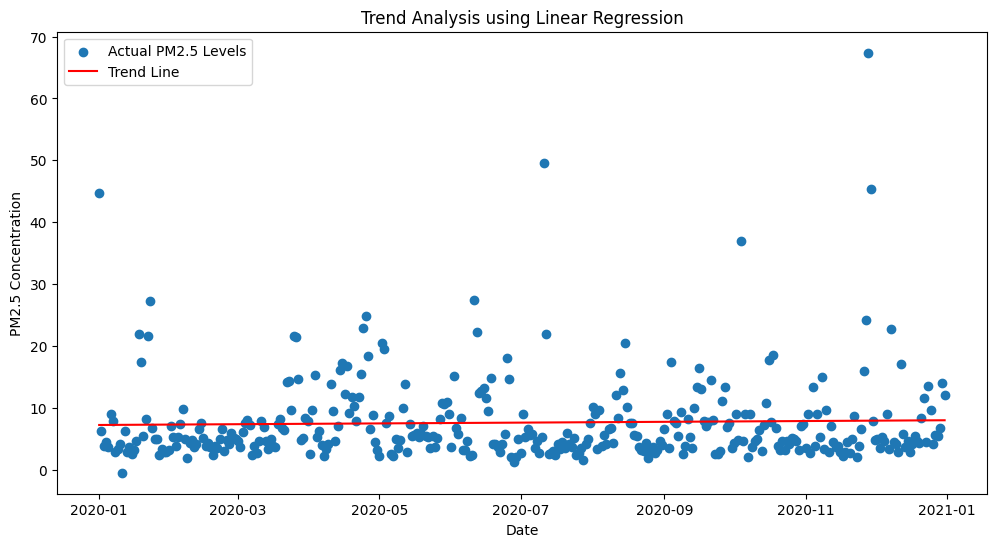

The slope (trend) of the regression line is: 0.0021


In [370]:

df_2020['Date'] = pd.to_datetime(df_2020['Date'])
# Extract numerical representation of date for regression
df_2020['days_since_start'] = (df_2020['Date'] - df_2020['Date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df_2020[['days_since_start']], df_2020['Rathmines'])

# Extract slope (trend) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df_2020['Date'], df_2020['Rathmines'], label='Actual PM2.5 Levels')
plt.plot(df_2020['Date'], model.predict(df_2020[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

# Print the slope (trend) of the regression line
print(f'The slope (trend) of the regression line is: {slope:.4f}')

<ipython-input-371-f64b259157a3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_2021['Date'] = pd.to_datetime(df_2021['Date'])
<ipython-input-371-f64b259157a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Date'] = pd.to_datetime(df_2021['Date'])
<ipython-input-371-f64b259157a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['days_since_

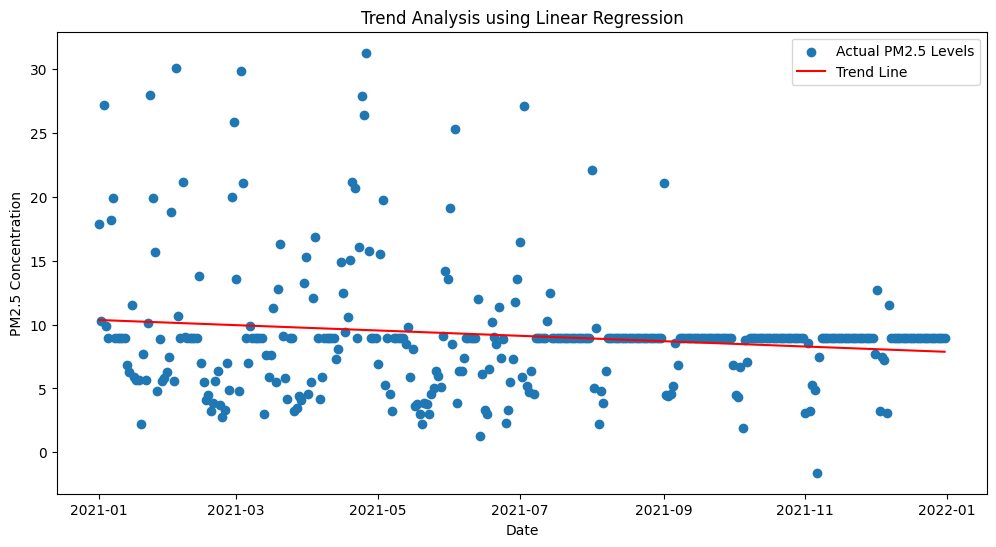

The slope (trend) of the regression line is: -0.0068


In [371]:

df_2021['Date'] = pd.to_datetime(df_2021['Date'])
# Extract numerical representation of date for regression
df_2021['days_since_start'] = (df_2021['Date'] - df_2021['Date'].min()).dt.days

# Fit linear regression model
model = LinearRegression()
model.fit(df_2021[['days_since_start']], df_2021['Rathmines'])

# Extract slope (trend) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(df_2021['Date'], df_2021['Rathmines'], label='Actual PM2.5 Levels')
plt.plot(df_2021['Date'], model.predict(df_2021[['days_since_start']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Trend Analysis using Linear Regression')
plt.legend()
plt.show()

# Print the slope (trend) of the regression line
print(f'The slope (trend) of the regression line is: {slope:.4f}')

In [372]:
# Load the dataset
df = pd.read_csv('no22020.csv')
# Drop the unwanted columns columns
df = df.drop(columns=['Birr', 'DAA', 'Sligo', 'Tallaght', 'Carrick-on-Shannon', 'Portlaoise', 'Dublin Port', 'Emo'])

print(df.head(30))
print(df.info())

          Date  Time  Ballyfermot  Blanchardstown  Castlebar  Cork_SouthLink  \
0   01/01/2020     1       18.336          42.784      7.067          35.526   
1   01/01/2020     2       12.606          34.571      6.494          33.807   
2   01/01/2020     3       14.516          18.718      5.539          35.908   
3   01/01/2020     4       22.156          24.257      4.775          34.571   
4   01/01/2020     5       27.695          58.828      3.438          27.313   
5   01/01/2020     6       34.762          43.357      3.820          23.875   
6   01/01/2020     7       32.088          30.178      3.056          24.448   
7   01/01/2020     8       33.425          34.953      3.629          16.808   
8   01/01/2020     9       35.526          25.785      3.438          15.280   
9   01/01/2020    10       34.380          27.313      4.584          17.572   
10  01/01/2020    11       32.470          29.223      4.584          15.280   
11  01/01/2020    12       23.684       

In [377]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the date from the datetime column
df['Date'] = df['Date'].dt.date

# Group by date and calculate the mean for each day
daily_average = df.groupby('Date')['Rathmines'].mean().reset_index()

# Display the daily average DataFrame
print(daily_average)

           Date  Rathmines
0    2020-01-01  32.565500
1    2020-01-02  14.141958
2    2020-01-03  14.786583
3    2020-01-04   8.220958
4    2020-01-05   4.751125
..          ...        ...
361  2020-12-27   6.104042
362  2020-12-28   7.966292
363  2020-12-29  11.826083
364  2020-12-30  23.206500
365  2020-12-31  16.887583

[366 rows x 2 columns]


In [256]:
df.head()

,Date,Time,Ballyfermot,Blanchardstown,Castlebar,Cork_SouthLink,Davitt Road,Dun Laoghaire,Dundalk,Kilkenny,...,Limerick Peoples Park,Navan,Pearse Street,Rathmines,Ringsend,St John's Road,Swords,UCC,Waterford,Winetavern Street
0,2020-01-01,1,18.336,42.784,7.067,35.526,13.943,10.887,20.055,18.527,...,31.133,32.470,56.345,15.471,16.999,49.851,17.572,29.796,16.235,37.818
1,2020-01-01,2,12.606,34.571,6.494,33.807,25.021,13.561,18.527,18.527,...,17.572,14.516,37.627,11.842,23.302,42.593,13.561,25.403,16.426,32.088
2,2020-01-01,3,14.516,18.718,5.539,35.908,11.269,14.898,9.741,12.797,...,12.606,13.179,36.863,23.302,18.336,24.066,13.561,25.785,18.909,20.819
3,2020-01-01,4,22.156,24.257,4.775,34.571,8.977,13.752,8.213,9.168,...,4.202,15.853,38.391,25.976,14.516,32.088,28.077,22.156,13.179,31.706
4,2020-01-01,5,27.695,58.828,3.438,27.313,22.156,24.830,7.258,7.831,...,2.674,30.178,34.380,22.347,17.190,44.503,28.841,24.448,18.527,38.964


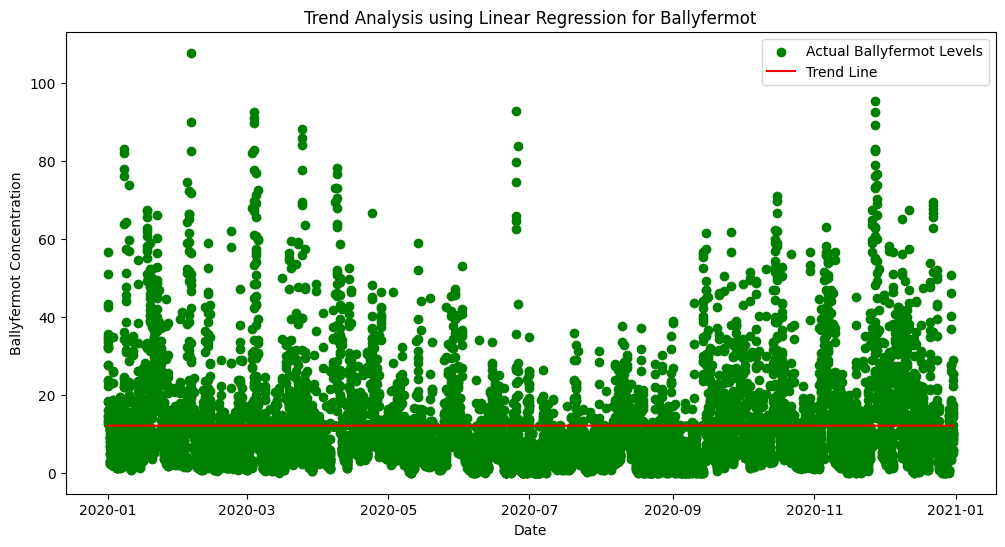

The slope (trend) of the regression line for Ballyfermot is: 0.0000


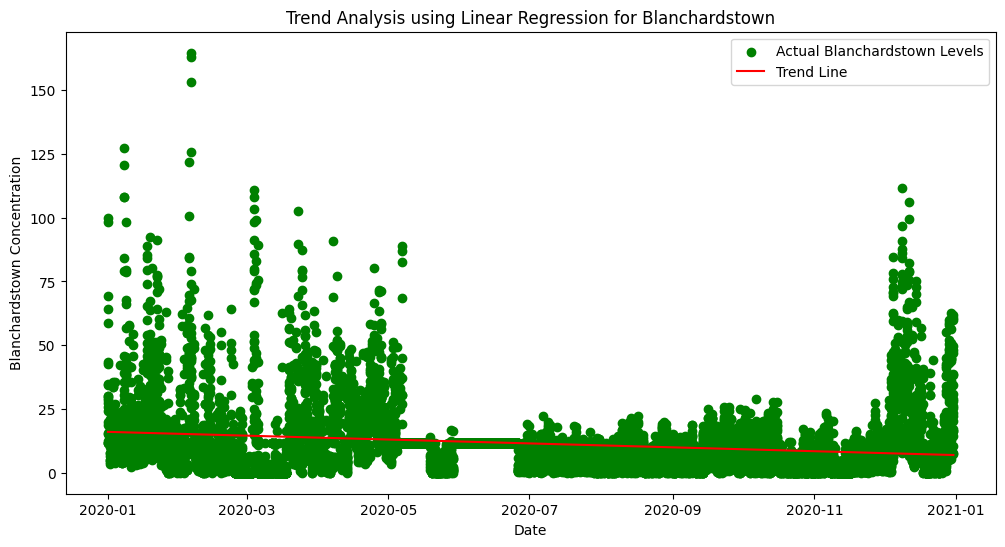

The slope (trend) of the regression line for Blanchardstown is: -0.0249


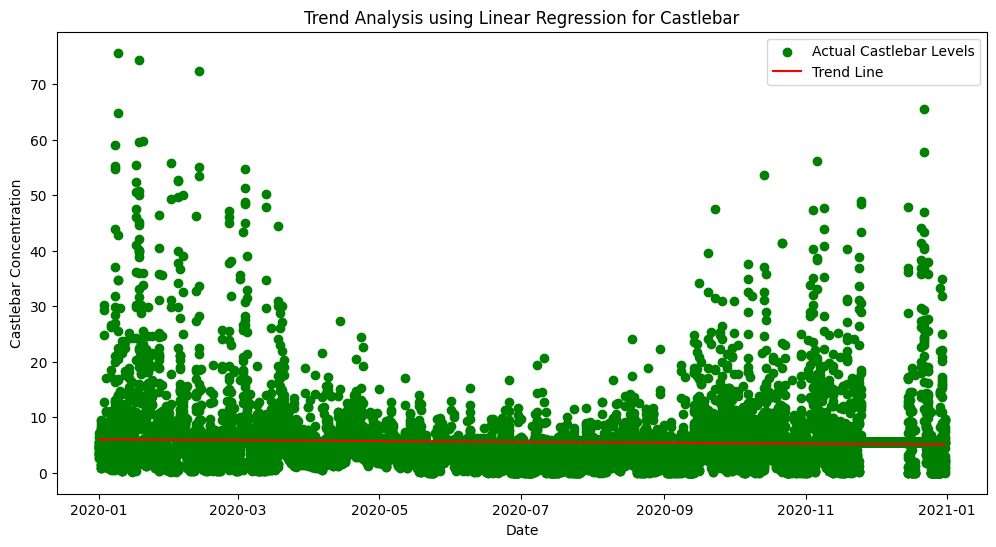

The slope (trend) of the regression line for Castlebar is: -0.0025


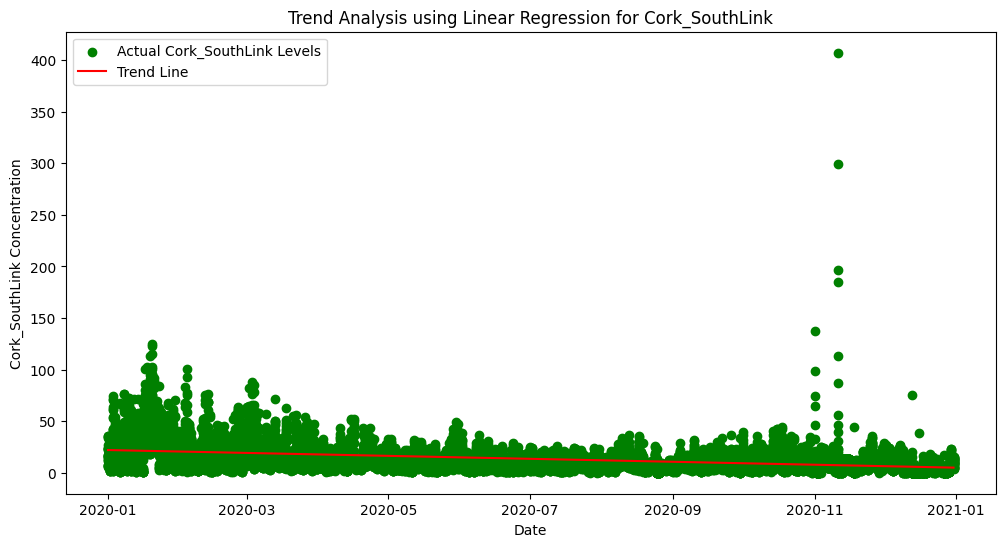

The slope (trend) of the regression line for Cork_SouthLink is: -0.0467


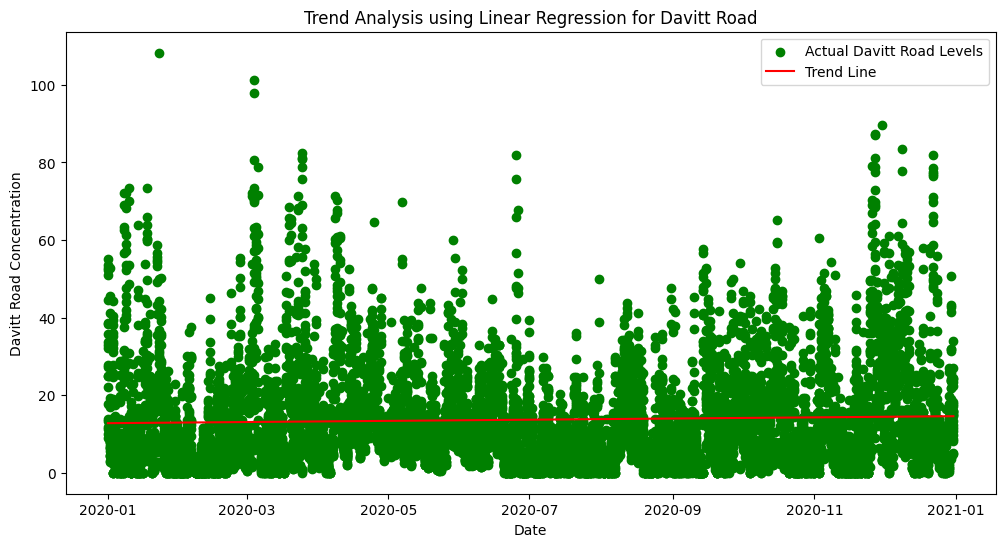

The slope (trend) of the regression line for Davitt Road is: 0.0049


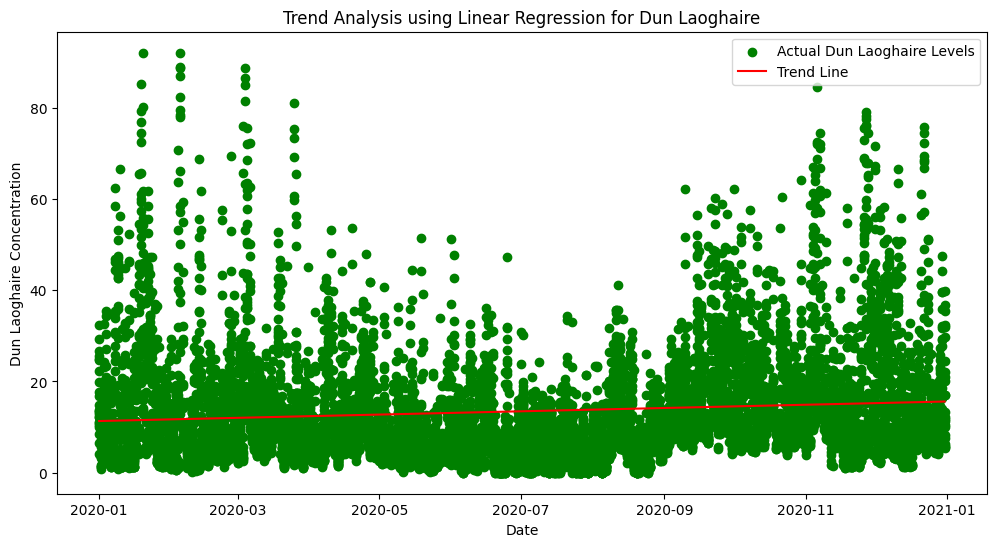

The slope (trend) of the regression line for Dun Laoghaire is: 0.0117


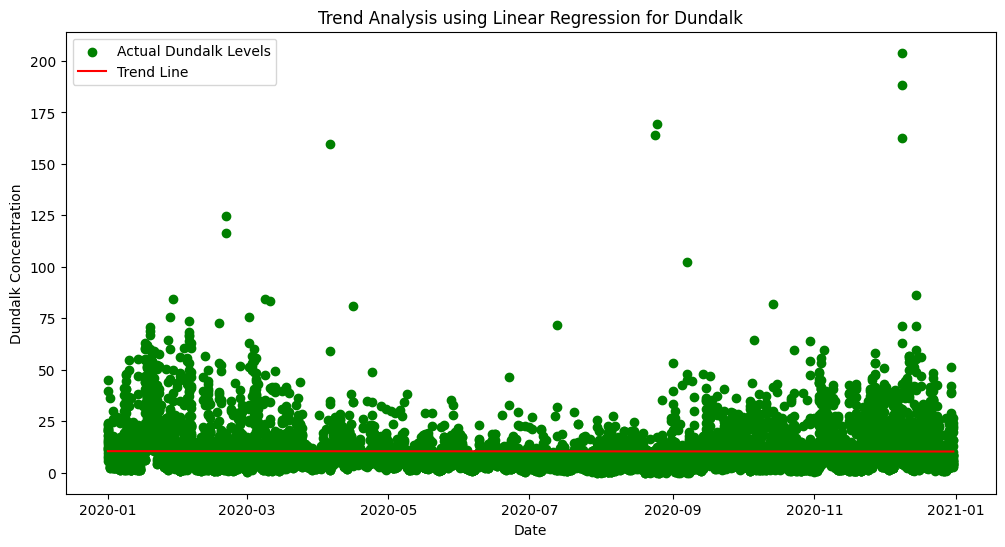

The slope (trend) of the regression line for Dundalk is: -0.0005


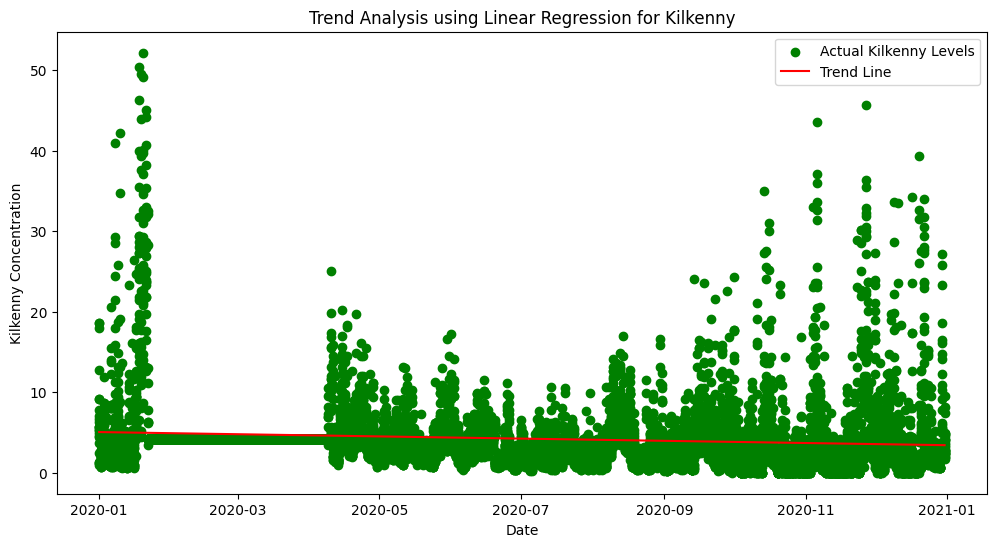

The slope (trend) of the regression line for Kilkenny is: -0.0045


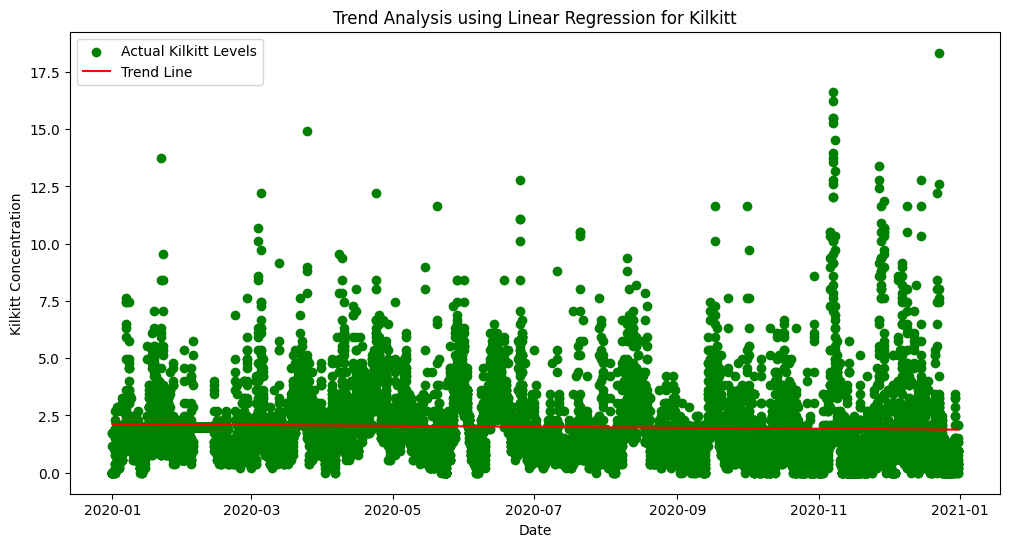

The slope (trend) of the regression line for Kilkitt is: -0.0007


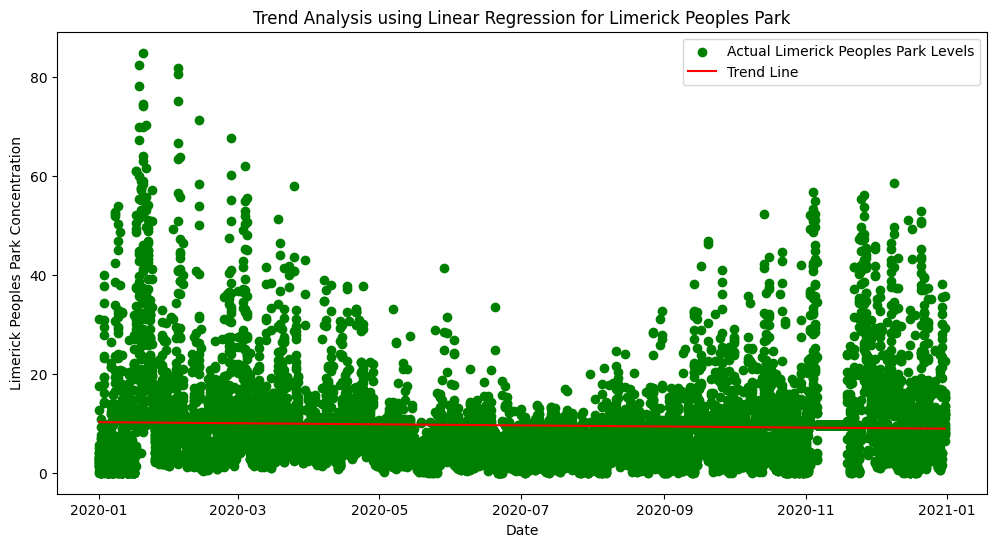

The slope (trend) of the regression line for Limerick Peoples Park is: -0.0036


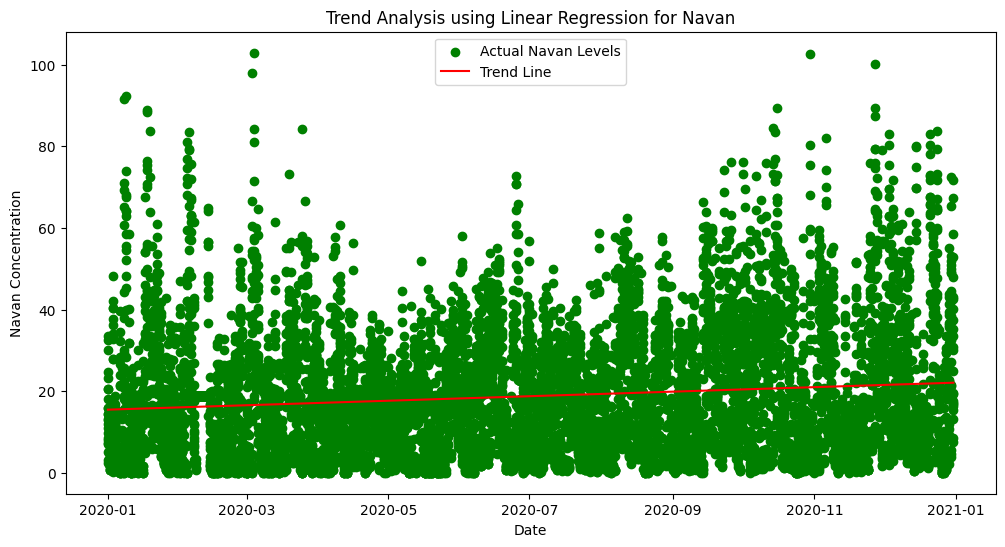

The slope (trend) of the regression line for Navan is: 0.0181


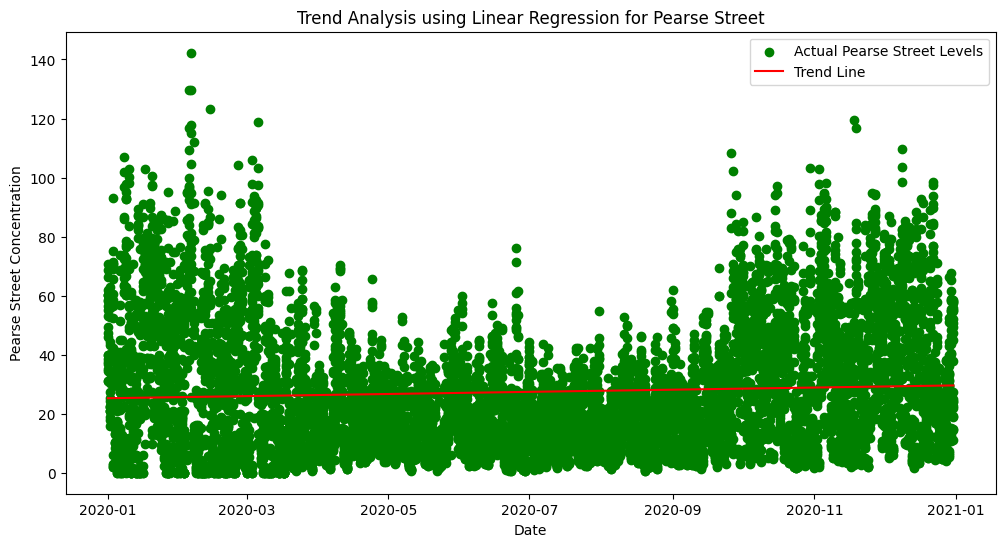

The slope (trend) of the regression line for Pearse Street is: 0.0119


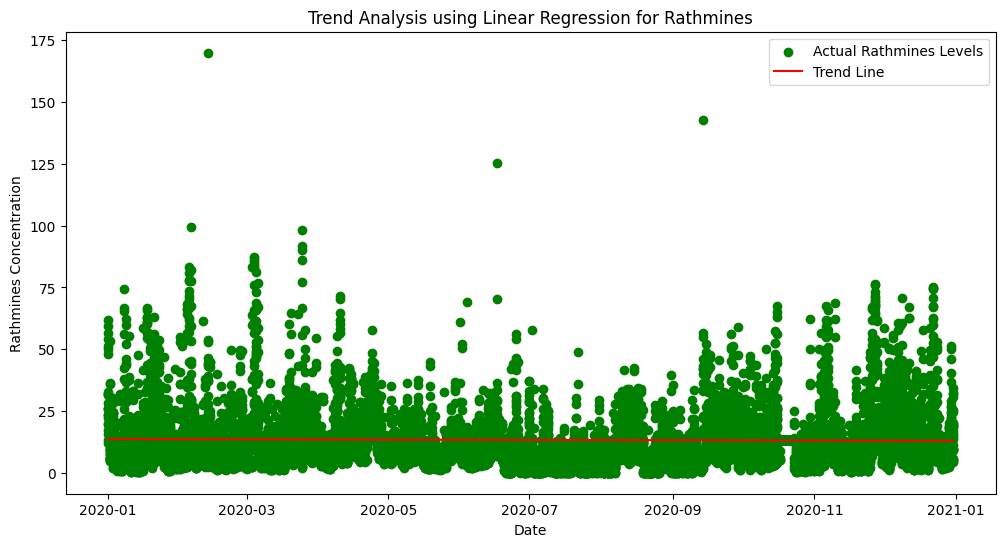

The slope (trend) of the regression line for Rathmines is: -0.0021


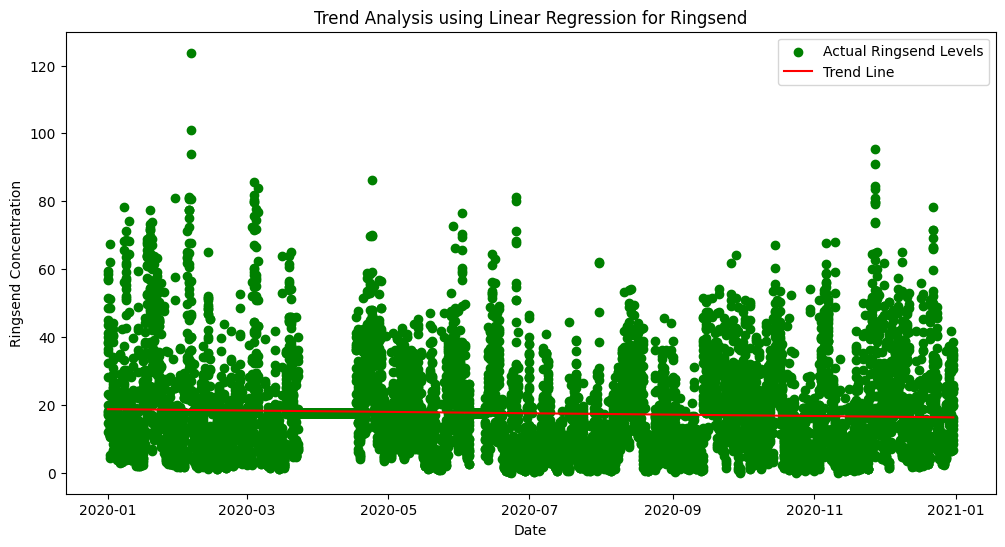

The slope (trend) of the regression line for Ringsend is: -0.0066


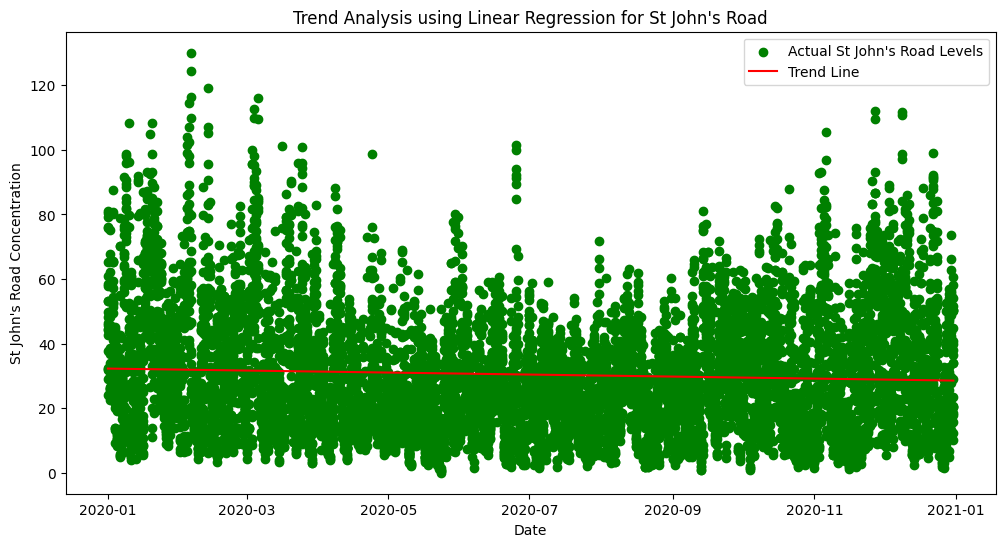

The slope (trend) of the regression line for St John's Road is: -0.0102


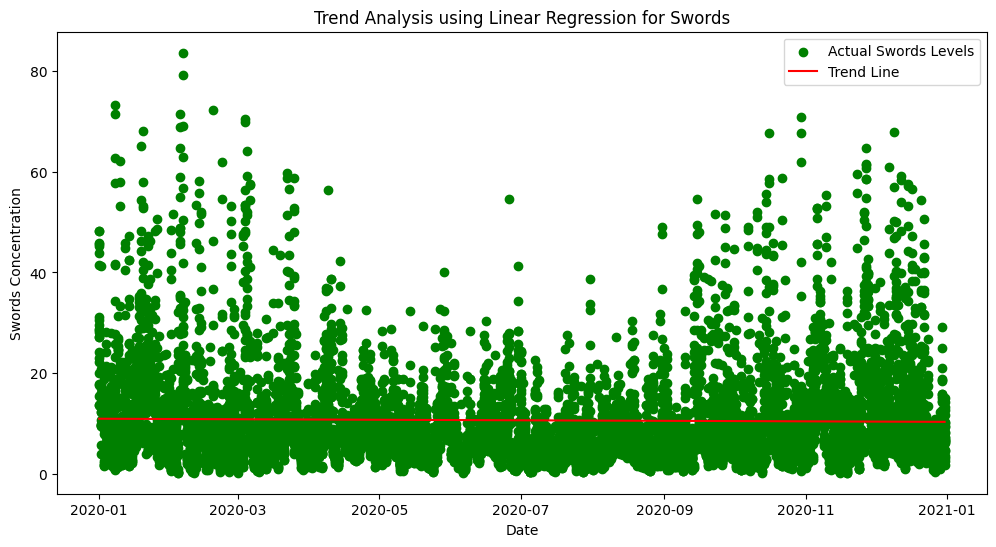

The slope (trend) of the regression line for Swords is: -0.0017


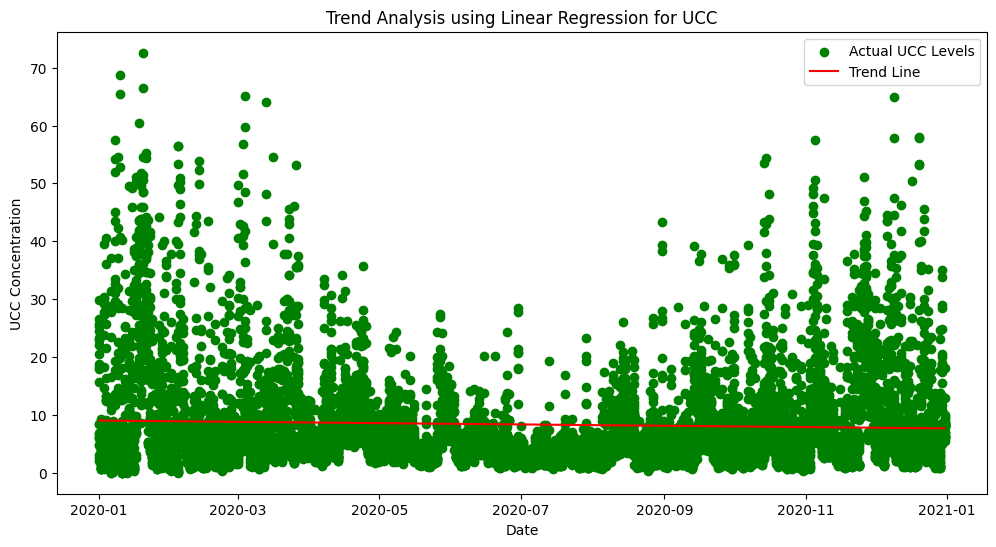

The slope (trend) of the regression line for UCC is: -0.0037


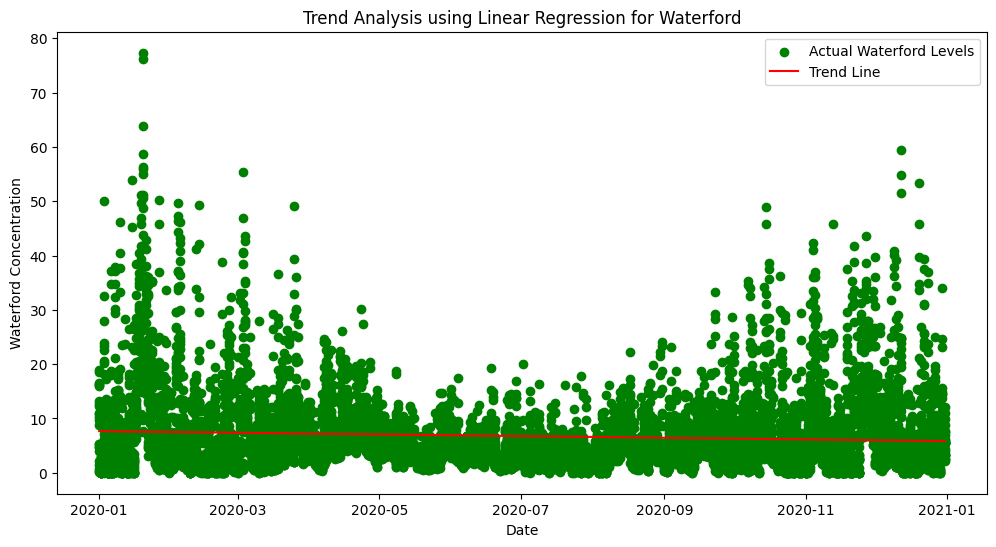

The slope (trend) of the regression line for Waterford is: -0.0050


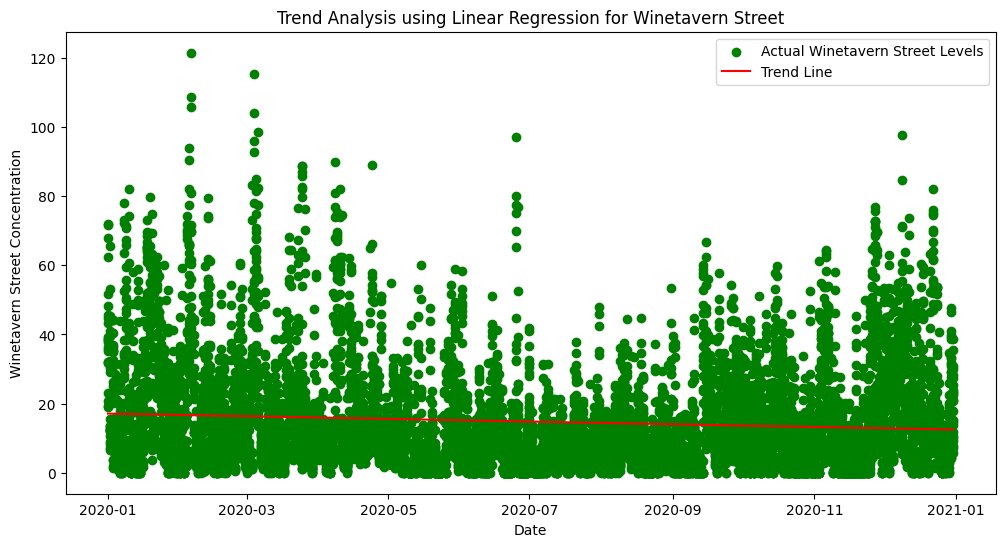

The slope (trend) of the regression line for Winetavern Street is: -0.0127


In [378]:
df['days_since_start'] = (df['Date'] - df['Date'].min()).dt.days

# Omit the first two columns and the last column
columns_to_exclude = ['Date', 'Time', df.columns[-1]]
df_subset = df.drop(columns=columns_to_exclude)

# Fill missing values with the mean for the remaining columns
df_subset = df_subset.apply(lambda col: col.fillna(col.mean()))

# Fit linear regression model for each remaining column
for column in df_subset.columns:
    model = LinearRegression()
    model.fit(df[['days_since_start']], df_subset[column])

    # Extract slope  and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    # Plot the data and the regression line
    plt.figure(figsize=(12, 6))
    plt.scatter(df['Date'], df_subset[column], label=f'Actual {column} Levels', color='green')
    plt.plot(df['Date'], model.predict(df[['days_since_start']]), color='red', label='Trend Line')
    plt.xlabel('Date')
    plt.ylabel(f'{column} Concentration')
    plt.title(f'Trend Analysis using Linear Regression for {column}')
    plt.legend()
    plt.show()

    # Print the slope (trend) of the regression line
    print(f'The slope (trend) of the regression line for {column} is: {slope:.4f}')